In [1]:
import yfinance as yf 
import nasdaqdatalink as ndl
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (12,5)

import apikey

## AAPL

In [2]:
data = yf.download('AAPL', start='2000-01-01', interval='1d')

[*********************100%***********************]  1 of 1 completed


In [3]:
data['simple_return'] = data['Adj Close'].pct_change(1)
data['log_return'] = np.log(data['Adj Close']/data['Adj Close'].shift(1))

In [4]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,simple_return,log_return
Date,,,,,,,,
2022-02-14,167.369995,169.580002,166.559998,168.880005,168.880005,86062800,0.001423,0.001422
2022-02-15,170.970001,172.949997,170.250000,172.789993,172.789993,64286300,0.023152,0.022889
2022-02-16,171.850006,173.339996,170.050003,172.550003,172.550003,61177400,-0.001389,-0.001390
2022-02-17,171.029999,171.910004,168.470001,168.880005,168.880005,69589300,-0.021269,-0.021499
2022-02-18,169.820007,170.539993,166.190002,167.300003,167.300003,82614200,-0.009356,-0.009400


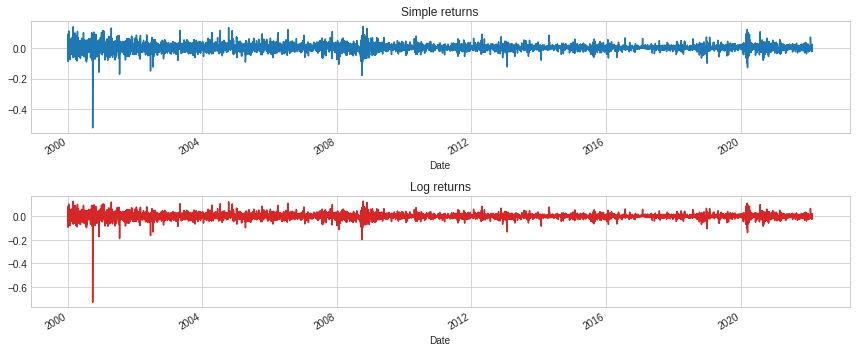

In [5]:
fig, ax = plt.subplots(2,1)
data.simple_return.plot(ax=ax[0], title='Simple returns', color='tab:blue')
data.log_return.plot(ax=ax[1], title='Log returns', color='tab:red')
plt.tight_layout()
plt.show()

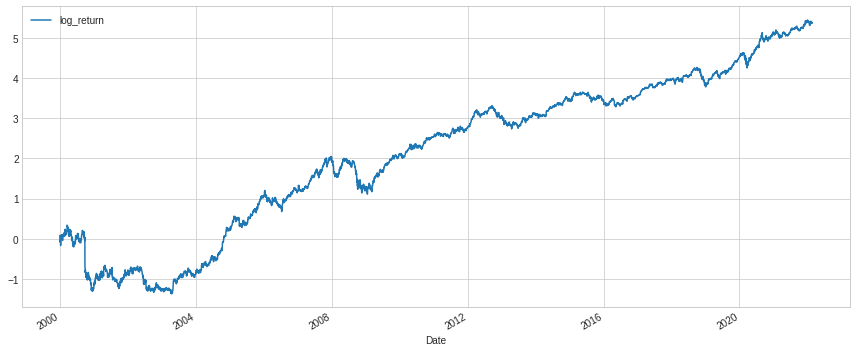

In [6]:
data[['log_return']].cumsum().plot()
plt.tight_layout()
plt.show()

## CPI

In [7]:
 ndl.ApiConfig.api_key = apikey.nasdaq_data_link_api_key

In [8]:
cpi = ndl.get('RATEINF/CPI_USA', start_date='1999-12-31')
cpi 

,Value
Date,
1999-12-31,168.300
2000-01-31,168.800
2000-02-29,169.800
2000-03-31,171.200
2000-04-30,171.300
...,...
2021-09-30,274.310
2021-10-31,276.589
2021-11-30,277.948


In [9]:
df = data[['Adj Close']].resample('M').last()
df = df.join(cpi, how='left')
df.dropna(inplace=True)
df.rename(columns={'Value':'cpi'}, inplace=True)

In [10]:
df 

,Adj Close,cpi
Date,,
1999-12-31,0.786033,168.300
2000-01-31,0.793200,168.800
2000-02-29,0.876344,169.800
2000-03-31,1.038328,171.200
2000-04-30,0.948496,171.300
...,...,...
2021-09-30,141.113998,274.310
2021-10-31,149.391357,276.589
2021-11-30,165.089676,277.948


In [11]:
df['log_return'] = np.log(df['Adj Close']/df['Adj Close'].shift(1))
df['inflation_rate'] = np.log(df['cpi']/df['cpi'].shift(1))
df['real_return'] = df['log_return'] - df['inflation_rate']

In [12]:
df 

,Adj Close,cpi,log_return,inflation_rate,real_return
Date,,,,,
1999-12-31,0.786033,168.300,NaN,NaN,NaN
2000-01-31,0.793200,168.800,0.009077,0.002966,0.006110
2000-02-29,0.876344,169.800,0.099683,0.005907,0.093776
2000-03-31,1.038328,171.200,0.169609,0.008211,0.161398
2000-04-30,0.948496,171.300,-0.090490,0.000584,-0.091074
...,...,...,...,...,...
2021-09-30,141.113998,274.310,-0.070462,0.002712,-0.073174
2021-10-31,149.391357,276.589,0.057001,0.008274,0.048728
2021-11-30,165.089676,277.948,0.099919,0.004901,0.095018


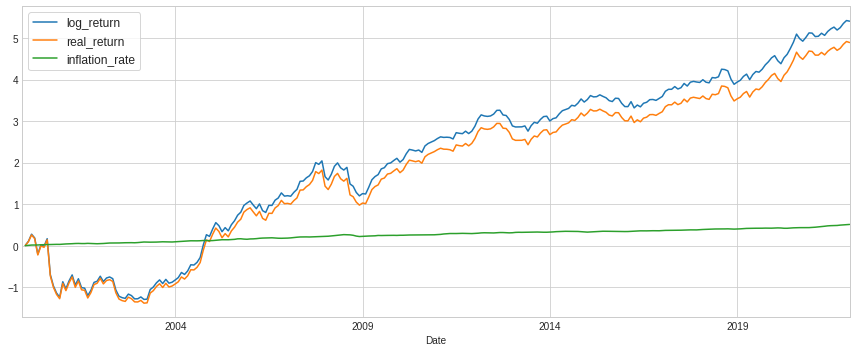

In [13]:
df[['log_return', 'real_return', 'inflation_rate']].cumsum().plot()
plt.tight_layout()
plt.legend(frameon=True, fontsize=12)
plt.show()